In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import nana
from astropy.table import Table
from astropy.io import ascii

In [2]:
data = pd.read_csv('kplr011360704.dat')
data = pd.read_csv('kplr011360704.dat', sep=r'\s+', header=None, names=['time', 'flux'])

Text(0, 0.5, 'Flux')

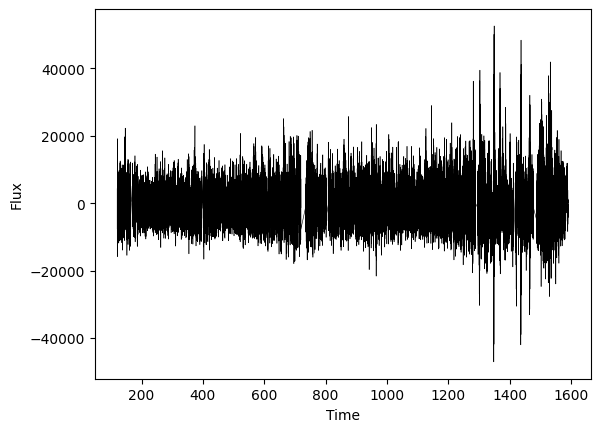

In [3]:
plt.plot(data['time'], data['flux'], 'k-', linewidth = 0.4)
plt.xlabel("Time")
plt.ylabel("Flux")

In [4]:
lc, delta_f, sampling_time = nana.star('KIC 011360704')

In [5]:
f_max = (3 / (2*sampling_time))
f_min = delta_f/3

In [6]:
t_fit, flux_fit, weight_fit = nana.mask_vals(lc)

In [7]:
freq_full, power_full = nana.pg_full(f_min, f_max, lc)

(0.0, 15.0)

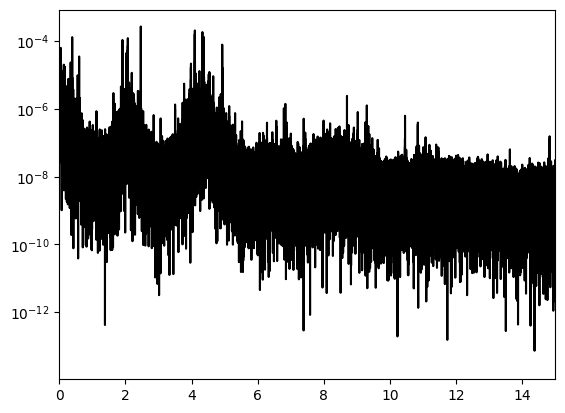

In [22]:
plt.plot(freq_full, power_full, 'k-')
plt.axvline(1/(2*sampling_time))
plt.axvline(fc)
plt.semilogy()
plt.xlim(0, 15)

In [9]:
freq_mini, power_mini = nana.pg_mini(f_min, f_max, lc )

In [10]:
indices = nana.get_filtered_peaks(12, freq_mini, power_mini)

In [11]:
refined_freq, refined_power, second_derivatives = nana.refine_peaks(freq_mini, power_mini, indices)

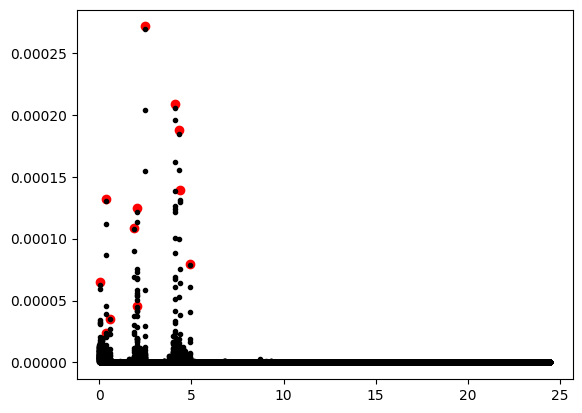

In [12]:
plt.scatter(freq_mini[indices], refined_power, color = 'r', marker = 'o')
#plt.axvline(freq_mini[indices[0]])
plt.plot(freq_mini, power_mini, 'k.')

In [13]:
fc = nana.folding_freq(delta_f, freq_full, power_full, sampling_time, False)

In [14]:
regions, final_freqs, chi2s = nana.region_and_freq(indices, fc, f_min, freq_mini, power_mini, t_fit, flux_fit, weight_fit)

In [15]:
a_early, a_late, b_early, b_late = nana.check_coherence(t_fit, flux_fit, weight_fit, final_freqs)

In [16]:
rate_of_phase, rate_of_amp = nana.change_in_phase_and_amp(a_early, a_late, b_early, b_late, t_fit)

In [17]:
delta_chi2s = nana.null_chi_squared(t_fit, flux_fit, weight_fit) - chi2s

In [18]:
sharpnesses = nana.sharpness(second_derivatives, refined_power)

In [ ]:
data = Table()


data['modes'] = final_freqs
data['regions'] = regions
data['corresponding_freq_in_region_A'] = refined_freq
data['sharpness'] = sharpnesses
data['delta_chi_squares'] = delta_chi2s
data['rate_of_change_of_phase'] = rate_of_phase
data['rate_of_change_of_amplitude'] = rate_of_amp

ascii.write(
    data,
    'aerts_star1.csv',
    overwrite=True,
    format="csv",
    formats={
        "modes": "{:.10f}",
        "corresponding_freq_in_region_A": "{:.5f}",
        "sharpness": "{:.7e}",
        "delta_chi_squares": "{:.7e}",
        "rate_of_change_of_phase": "{:.7e}",
        "rate_of_change_of_amplitude": "{:.7e}"
    }
)


In [ ]:
t_fit[1] - t_fit[0]

In [ ]:
lc, delta_f, sampling_time = nana.star('kplr011360704')

In [ ]:
print(lc)

In [ ]:
le, delta_f, sampling_time = nana.star('kplr004939281')

In [ ]:
print(le)